<a href="https://colab.research.google.com/github/RahulJung/gan-lstm-stock-predictor/blob/main/LSTM_Basemodel_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Forecasting stock prices has long been a critical area of interest in financial analytics, offering significant implications for investment strategies, risk management, and market regulation. Stock markets are influenced by a wide array of factors, including macroeconomic indicators, company-specific performance, investor sentiment, and unforeseen geopolitical events, resulting in highly volatile and nonlinear patterns in stock price movements. Traditional statistical and econometric models, such as ARIMA and GARCH, often face limitations in capturing the intricate temporal dependencies and nonlinear behaviors present in financial time series data.

With the advent of deep learning, new methodologies have emerged that are capable of modeling complex sequential relationships in data more effectively. Among these, Long Short-Term Memory (LSTM) networks — a specialized variant of recurrent neural networks (RNNs) — have shown considerable promise in financial time series forecasting, particularly for stock price prediction. This study investigates the application of LSTM models for predicting the closing prices of publicly traded stocks, using Apple Inc. (AAPL) as a case study. By leveraging historical closing price data, this research aims to evaluate the predictive performance of LSTM networks and examine their potential value in practical investment decision-making contexts.



# **Long Short-Term Memory (LSTM) Models for Stock Price Prediction**


Long Short-Term Memory (LSTM) networks are a class of Recurrent Neural Networks (RNNs) specifically designed to address the challenge of learning long-range dependencies in sequential data. In standard RNNs, information is propagated from one time step to the next through a hidden state. However, as sequences grow longer, conventional RNNs tend to suffer from the vanishing or exploding gradient problem, which significantly degrades their ability to capture relationships between distant observations in a sequence.

LSTM networks overcome these limitations through the introduction of a sophisticated internal architecture composed of memory cells and gating mechanisms. Each LSTM unit incorporates:

1. An input gate to control the extent to which new information enters the cell state.

2. A forget gate to decide what information should be discarded from the cell state.

3. An output gate to determine what part of the cell state is exposed to the next hidden state.

This structure allows LSTMs to selectively retain, update, and output information over long sequences, making them particularly well-suited for modeling financial time series, where market behaviors can be influenced by both recent and distant past events.

In the context of stock price prediction, LSTM models can learn the sequential patterns embedded in historical price data and use this learned structure to forecast future prices. Their ability to model nonlinear, time-dependent relationships offers a significant advantage over traditional linear models, positioning LSTMs as a valuable tool for developing data-driven, adaptive financial forecasting systems. This study demonstrates the practical implementation of an LSTM-based stock price prediction model, assessing its effectiveness through predictive accuracy and its relevance to real-world financial decision-making.



# **Importing Libraries:**


### **Explanation:**

**yfinance:** This library is used to download historical stock data from Yahoo Finance.

**numpy:** Provides support for large, multi-dimensional arrays and matrices, which is commonly used in numerical operations.

**pandas:** A powerful library for data manipulation and analysis, particularly useful for handling time series data.

**MinMaxScaler:** Part of scikit-learn, it scales data to a specified range (0 to 1 in this case), which is important for neural network training.

**Sequential, LSTM, Dense:** Components of the Keras library, where Sequential is used to initialize the neural network, LSTM represents the LSTM layer, and Dense is used to add a fully connected layer to the neural network.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
!pip install snowflake-connector-python
!pip install snowflake-connector-python pandas sqlalchemy snowflake-sqlalchemy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 3.1 MB/s eta 0:00:00


In [ ]:


from sqlalchemy import create_engine
from snowflake.sqlalchemy import URL

engine = create_engine(URL(
    account='VL15725.us-east-2.aws',
    user='ManiKrishna9',
    password='38e5fa@Krishna',
    database='STOCK_DATABASE',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'
))

# Use with pandas
import pandas as pd
df = pd.read_sql("SELECT * FROM STOCK_FINAL_CLEANED", engine)  # Cleaner than raw connector
engine.dispose()  # Explicit cleanup

In [ ]:
df.head(10)

,date,open,high,low,close,volume,dividends,stocksplits,ticker,money_flow_idx,...,ich_tenkan_sen,ich_kijun_sen,comm_channel_idx,stocchastic_osci,fib_23_6_retrace_lvl,fib_38_2_retrace_lvl,fib_61_8_retrace_lvl,std_dev,exp_mov_avg_12,exp_mov_avg_26
0,2024-01-26,328.550,323.757,330.109,323.550,375676,0.0,0.0,HUBB,62.173,...,325.330,322.227,68.702,47.131,397.538,353.279,281.737,4.868,320.675,316.408
1,2024-01-26,63.071,63.120,63.745,62.798,4595400,0.0,0.0,DD,24.232,...,68.185,69.562,-144.022,-5.928,79.159,73.264,63.736,4.213,68.434,70.196
2,2024-01-26,121.072,119.673,121.451,119.459,749000,0.0,0.0,AWK,46.420,...,123.599,125.158,-108.515,-10.903,161.747,152.399,137.290,3.638,122.180,124.050
3,2024-01-26,139.621,139.917,140.164,138.891,1910200,0.0,0.0,ROST,83.742,...,137.563,137.060,159.248,82.038,135.352,122.741,102.355,1.821,135.729,134.002
4,2024-01-26,130.012,136.064,136.809,130.012,5350300,0.0,0.0,COF,51.595,...,129.585,129.585,160.189,53.293,180.130,161.763,132.073,2.486,126.431,124.186
5,2024-01-29,72.980,74.570,74.620,72.710,2685700,0.0,0.0,EW,47.562,...,74.470,75.160,-26.842,-45.726,114.481,104.460,88.260,1.238,73.218,73.036
6,2024-01-29,57.160,57.535,57.593,56.996,14547100,0.0,0.0,KO,42.751,...,57.473,57.054,-27.504,0.000,67.145,63.412,57.377,0.414,57.069,56.875
7,2024-01-29,56.351,57.411,57.623,56.101,10102800,0.0,0.0,NEE,46.940,...,56.419,58.033,-25.013,14.675,76.768,71.256,62.346,1.944,56.052,56.594
8,2024-01-29,464.563,470.197,470.286,463.053,615800,0.0,0.0,PH,61.948,...,461.435,460.112,108.045,61.955,594.128,524.621,412.267,7.206,457.533,450.673
9,2024-01-29,109.814,109.992,110.376,109.074,544000,0.0,0.0,LDOS,45.074,...,108.911,107.718,96.742,57.269,170.947,152.813,123.500,1.241,107.983,107.000


In [ ]:
df.shape

(498989, 35)

In [ ]:
df.describe()

,open,high,low,close,volume,dividends,stocksplits,money_flow_idx,on_balance_volume,accumu_dist_line,...,ich_tenkan_sen,ich_kijun_sen,comm_channel_idx,stocchastic_osci,fib_23_6_retrace_lvl,fib_38_2_retrace_lvl,fib_61_8_retrace_lvl,std_dev,exp_mov_avg_12,exp_mov_avg_26
count,498989.000000,498989.000000,498989.000000,498989.000000,4.989890e+05,498989.000000,498989.000000,498989.000000,4.989890e+05,4.989890e+05,...,498989.000000,498989.000000,498989.000000,4.989890e+05,498989.000000,498989.000000,498989.000000,498989.000000,498989.000000,498989.000000
mean,177.612047,177.623183,179.683198,175.507178,5.996354e+06,0.008762,0.000549,51.776132,1.016434e+08,-8.660093e+17,...,178.584408,178.122380,6.573398,-2.337303e+02,239.010548,215.072349,176.377718,5.271947,175.249157,174.869175
std,360.583757,360.628458,364.762450,356.523412,2.363339e+07,0.160875,0.095365,16.277048,1.004388e+09,4.134400e+20,...,362.213688,360.516904,88.404060,1.081585e+05,485.927101,432.254228,346.097129,11.129967,355.436062,353.995774
min,3.323000,3.295000,3.353000,3.288000,0.000000e+00,0.000000,0.000000,0.000000,-3.663222e+09,-8.995707e+21,...,3.406000,3.477000,-280.788000,-7.160845e+07,10.901000,10.334000,9.418000,0.000000,3.388000,3.436000
25%,56.964000,56.963000,57.623000,56.304000,9.973000e+05,0.000000,0.000000,40.329000,-5.490600e+06,4.694449e+09,...,57.308000,57.210000,-66.568000,-2.032500e+01,78.643000,73.148000,62.048000,1.346000,56.308000,56.270000
50%,104.829000,104.810000,106.088000,103.550000,2.081500e+06,0.000000,0.000000,51.815000,1.532800e+07,1.205781e+10,...,105.614000,105.324000,12.005000,1.965600e+01,146.592000,130.396000,108.769000,2.716000,103.577000,103.434000
75%,200.205000,200.193000,202.512000,197.896000,4.758100e+06,0.000000,0.000000,63.208000,7.384700e+07,2.836973e+10,...,201.297000,201.122000,80.057000,6.497600e+01,252.514000,230.434000,198.162000,5.590000,197.732000,197.660000
max,9914.170000,9924.400000,9964.770000,9794.000000,1.543911e+09,75.000000,50.000000,100.000000,3.890395e+10,4.163505e+21,...,9765.335000,9694.235000,279.497000,3.164810e+04,8467.013000,7565.409000,6108.022000,442.613000,9623.349000,9489.189000


In [ ]:
df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
dividends,float64
stocksplits,float64
ticker,object
money_flow_idx,float64


# **Downloading Historical Stock Data:**

Explanation:

stock_symbol: Specifies the stock symbol for which historical data is to be downloaded (in this case, 'AAPL' for Apple).

start_date and end_date: Define the date range for which historical stock data is to be retrieved.

yf.download(): Fetches historical stock data using Yahoo Finance API.

In [ ]:
# Download stock price data
# stock_symbol = 'AAPL'
# start_date = '2020–01–01'
# end_date = '2021–01–01'
# #data = yf.download(stock_symbol, start=start_date, end=end_date)
# data = yf.download('AAPL', start='2015-01-01', end='2020-12-31')

In [ ]:
# data = df[df['ticker'] == 'AAPL']
# data.head()
data = df[df['ticker'] == 'AAPL'][['date', 'open', 'high', 'low', 'close', 'volume']]
data.head(20)


,date,open,high,low,close,volume
22796,2023-05-24,169.616,170.360,170.935,169.051,45143500
22803,2023-05-25,170.925,171.500,172.402,170.211,56058300
22817,2023-05-30,175.436,175.773,177.448,175.049,55964400
22871,2023-06-07,176.903,176.288,179.649,175.792,61944600
22881,2023-06-08,176.367,179.014,179.282,175.931,50214900
22919,2023-06-15,182.375,184.408,184.913,182.197,65433200
22962,2023-06-26,185.221,183.674,186.430,183.634,48088700
22967,2023-06-27,184.289,186.440,186.767,184.071,50730800
23024,2023-07-07,189.761,189.037,191.010,188.601,46778000
23030,2023-07-10,187.630,186.985,188.353,185.429,59922200


Size of the DataFrame:
(1000, 6)

Summary Statistics:
              open         high          low        close        volume
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03
mean    174.242306   174.451827   176.171377   172.534519  7.035087e+07
std      32.810271    32.848741    33.026079    32.578897  2.899782e+07
min     120.685000   120.303000   122.135000   119.793000  2.323470e+07
25%     147.005250   147.348000   148.732250   145.733000  5.001420e+07
50%     169.595500   169.819500   171.425000   168.269500  6.457250e+07
75%     190.865000   191.110500   192.675250   189.647500  8.329162e+07
max     257.906000   258.736000   259.814000   257.347000  3.186799e+08

Missing Values:
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Data Types:
date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

First Few Rows:
             date     open     high      low

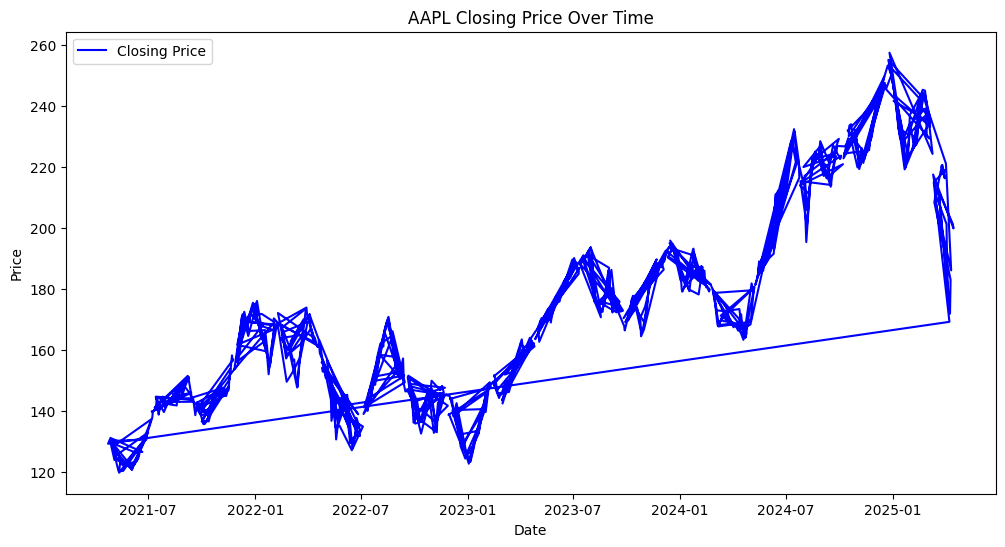

In [ ]:
# Size of the DataFrame
print("Size of the DataFrame:")
print(data.shape)

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Data types
print("\nData Types:")
print(data.dtypes)

# First few rows
print("\nFirst Few Rows:")
print(data.head())

# Unique values in each column
print("\nUnique Values in Each Column:")
print(data.nunique())

# Visualization (optional)
import matplotlib.pyplot as plt
data['date'] = pd.to_datetime(data['date'])  # Ensure 'date' is in datetime format

plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['close'], label='Closing Price', color='blue')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


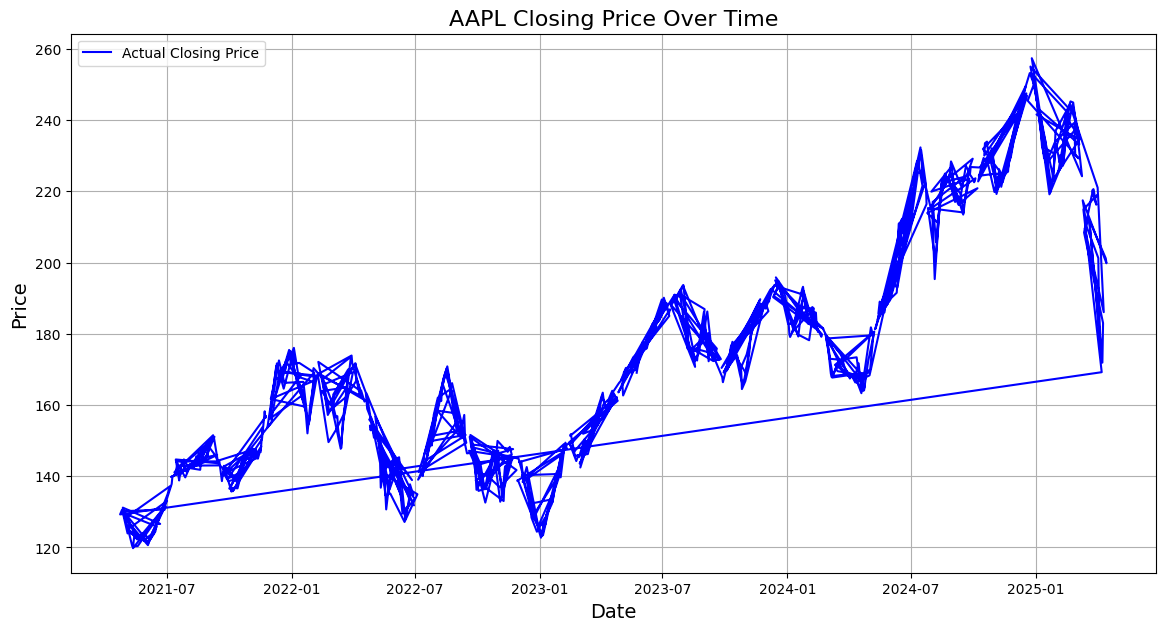

In [ ]:
import matplotlib.pyplot as plt

# Assume 'data' is your original full dataframe
# and it has 'Date' and 'Close' columns

plt.figure(figsize=(14,7))
plt.plot(data['date'], data['close'], color='blue', label='Actual Closing Price')
plt.title('AAPL Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


# **Data Preprocessing:**

Use Case: Preparing the historical stock data for input to a machine learning model.

Application: This section extracts and scales the closing prices, a crucial step in preparing the data for the LSTM model, ensuring that it is on a consistent scale for training.

In [ ]:
# Normalize prices
close_prices = data['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(close_prices)

# **Creating Input Data for LSTM:**

Use Case: Structuring the data into sequences for training the LSTM model.

Application: This function defines the input sequences (X) and corresponding target values (y) for training the LSTM model, which is essential for capturing temporal patterns in the data.

Explanation:

create_lstm_data: Defines a function to create input sequences for the LSTM model.

The function takes historical stock prices (data) and a specified number of time_steps to create input sequences x and corresponding target values y


In [ ]:
# Function to create sequences
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

# **Setting Time Steps and Creating Input Data:**

Use Case: Defining the number of time steps for the LSTM model and reshaping the data.

Application: This part sets the time steps, a hyperparameter affecting the memory of the LSTM. Reshaping the data ensures that it conforms to the input format expected by the LSTM layer.

Explanation:

time_steps: Sets the number of time steps for the LSTM model (in this case, 10).

x, y: Creates input data (x) and target values (y) using the previously defined function.

Reshapes the input data to the required format for the LSTM model.

In [ ]:
time_step = 60
X, y = create_dataset(scaled_prices, time_step)

# Reshape for LSTM (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# **Split into train and test**

In [ ]:

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# **Building the LSTM Model:**



Use Case: Constructing a neural network architecture suitable for time series prediction.

Application: The model architecture is designed with two LSTM layers and one dense layer. This configuration is suitable for capturing and learning complex patterns in sequential data like stock prices.

Explanation:

model: Initializes a sequential neural network model.

Adds two LSTM layers with 50 units each and a dense layer with 1 unit.

Compiles the model using the Adam optimizer and mean squared error as the loss function.

In [ ]:
# # Build LSTM model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# # Compile
# model.compile(optimizer='adam', loss='mean_squared_error')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional, Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Define the input shape here
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# **Training the Model:**

Use Case: Optimizing the model’s parameters using historical data.

Application: This part trains the LSTM model using historical stock prices, allowing the model to learn patterns and relationships within the data.

Explanation:

Trains the LSTM model using the prepared input data (x) and target values (y).

epochs=50: Specifies the number of training iterations.

batch_size=32: Sets the number of samples per gradient update.

In [ ]:
# Train

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 135ms/step - loss: 0.0981
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0188
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 0.0126
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0098
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0089
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.0084
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0087
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 0.0089
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0068
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - loss: 0.0081
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0076
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0082
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 0.0073
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.0068
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 0.0077

## **Evaluate the model**

**What this does:**

model.evaluate(X_train, y_train, verbose=0):
→ Calculates the loss (error) on the training set — how well the model learned from the data it was trained on.

model.evaluate(X_test, y_test, verbose=0):
→ Calculates the loss (error) on unseen test data — how well the model generalizes to new, unseen data.

verbose=0 just suppresses extra logs and keeps the output clean.

**Purpose (Why is this important?):**

To check for overfitting or underfitting:

If train loss is very low and test loss is high → Overfitting (model memorized the training data)

If both are high → Underfitting (model didn't learn well)

If both are low and close to each other → Good, balanced model

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')

Train Loss: 0.005009
Test Loss: 0.002837


# **Predicting Future Stock Prices:**

Use Case: Utilizing the trained model to make predictions for future stock prices.

Application: The code predicts future stock prices based on the last available historical data, providing insights for potential market movements.

Explanation:

future_dates: Generates future dates for prediction.

Extracts the last 10 closing prices to predict future prices.

Scales the last prices and prepares the input data for prediction.

Uses the trained LSTM model to predict future prices and inverse transforms the scaled predictions.

In [ ]:
# Predict and invert scaling
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step


# **Displaying Predictions:**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predictions)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')


Mean Absolute Error (MAE): 5.986084427853848
Mean Squared Error (MSE): 53.67887444916175
Root Mean Squared Error (RMSE): 7.326586821239598
R² Score: 0.6492982451662678


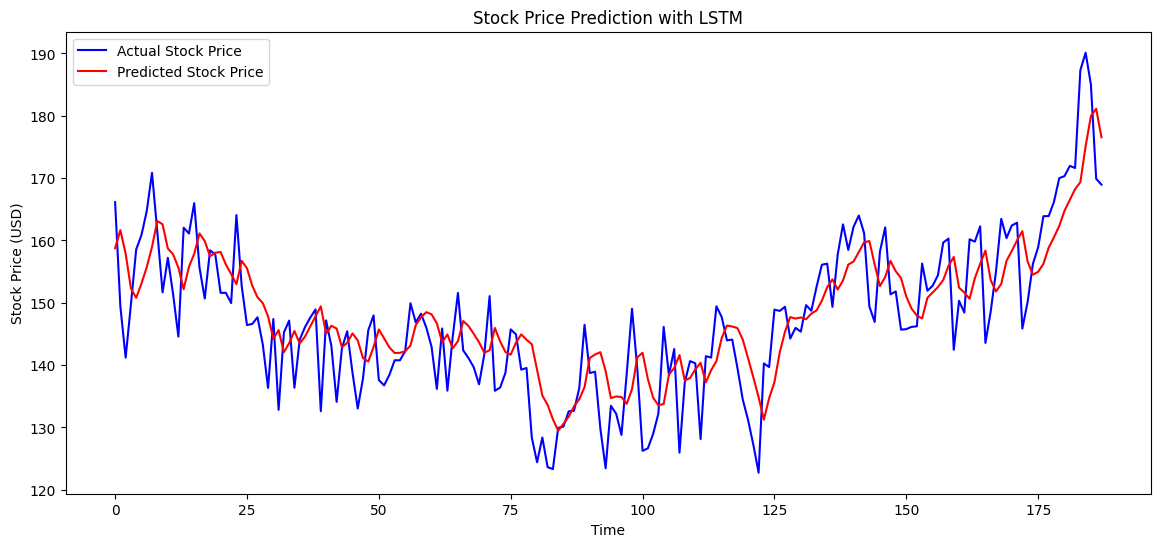

In [ ]:
# Plot results
plt.figure(figsize=(14,6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


# **Predict Stock Price for next 30 days**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Number of future days to predict
future_days = 30

# Start with the last time_step days from the test data
last_sequence = X_test[-1]

future_predictions = []

for _ in range(future_days):
    # Predict the next price
    next_pred = model.predict(last_sequence.reshape(1, time_step, 1))[0, 0]
    future_predictions.append(next_pred)

    # Update last_sequence for the next prediction
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(time_step, 1)

# Inverse transform the predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Create future dates
last_date = pd.to_datetime(data['date'].iloc[-1])  # Convert the last date to a datetime object
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# Fetch actual prices for future dates from yfinance
symbol = 'AAPL'
start_date = future_dates.min().strftime('%Y-%m-%d')
end_date = future_dates.max().strftime('%Y-%m-%d')

# Fetch the actual stock prices for the future dates
future_actual_data = yf.download(symbol, start=start_date, end=end_date)

# Reset index to make 'Date' a regular column
future_actual_data = future_actual_data.reset_index()

# Extract 'Date' and 'Close' columns safely
future_actual_prices = future_actual_data[['Date', 'Close']].copy()
future_actual_prices.columns = ['Date', 'Actual Price']  # Rename columns for clarity

# Create future predictions DataFrame
future_data = pd.DataFrame({
    'Date': future_dates,
    'Predicted Price': future_predictions.flatten()
})

# Merge actual prices into future_data - Removes holiday days (using inner join)
future_data = pd.merge(future_data, future_actual_prices, on='Date', how='inner')

# Reorder columns for clarity
future_data = future_data[['Date', 'Actual Price', 'Predicted Price']]

# Show final result
print(future_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

[*********************100%***********************]  1 of 1 completed

         Date  Actual Price  Predicted Price
0  2023-05-18    173.542007       176.547989
1  2023-05-19    173.651062       175.567917
2  2023-05-22    172.699326       173.537064
3  2023-05-23    170.082077       173.128387
4  2023-05-24    170.359619       172.888580
5  2023-05-25    171.499741       172.734909
6  2023-05-26    173.918716       172.643478
7  2023-05-30    175.772614       173.187027
8  2023-05-31    175.723053       173.362106
9  2023-06-01    178.538589       173.441238
10 2023-06-02    179.391190       173.413605
11 2023-06-05    178.032974       173.571625
12 2023-06-06    177.666183       173.503601
13 2023-06-07    176.288132       173.289673
14 2023-06-08    179.014450       173.161209
15 2023-06-09    179.401093       173.015015
16 2023-06-12    182.206711       173.131348
17 2023-06-13    181.730865       173.315460
18 2023-06-14    182.365341       173.400360
19 2023-06-15    184.407593       173.564301


# **Plot actual vs predicted future prices for 30 days**

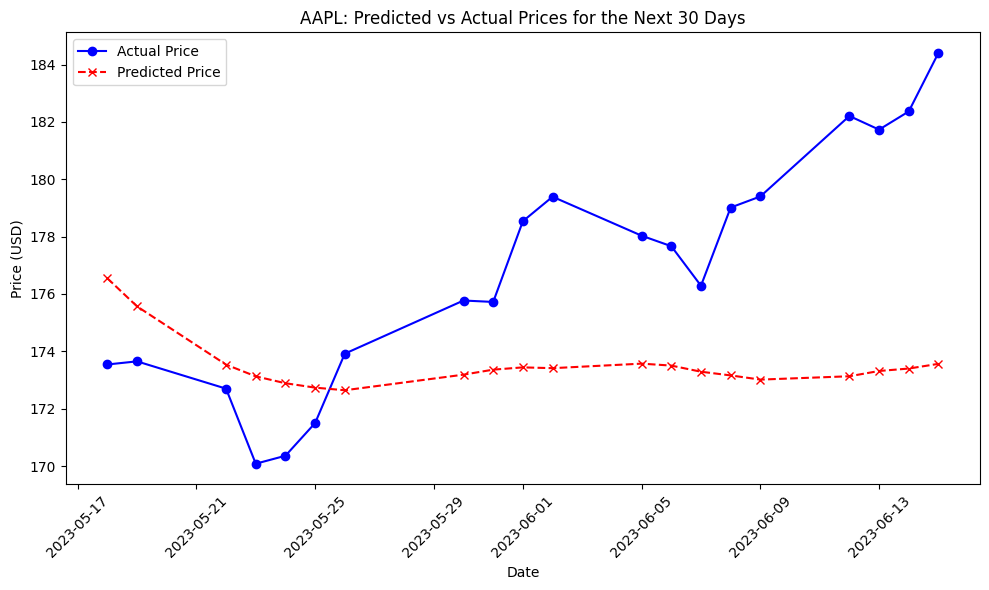

In [ ]:
import matplotlib.pyplot as plt

# Plotting Predicted vs Actual Prices
plt.figure(figsize=(10, 6))
plt.plot(future_data['Date'], future_data['Actual Price'], label='Actual Price', color='blue', marker='o')
plt.plot(future_data['Date'], future_data['Predicted Price'], label='Predicted Price', color='red', linestyle='--', marker='x')

# Adding title and labels
plt.title('AAPL: Predicted vs Actual Prices for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45)

# Adding a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


# **Visualizations**

Summary of the Visualizations:
Actual vs Predicted Plot: Helps assess how well the model fits the actual stock price.

Residuals Plot: Indicates whether the errors have any time-based patterns.

Histogram of Residuals: Helps check the normality of the residuals.

Cumulative Sum of Errors: Shows if the model is consistently biased in one direction.

Performance Metrics Bar Chart: A quick visual comparison of MAE, MSE, RMSE, and R² to assess overall model performance.

## **Stock Price Forecast vs. Actual Price with Confidence Interval.**

A confidence interval can show the potential uncertainty in the stock price prediction. This is helpful for business stakeholders to understand the range within which the stock price could move, aiding in risk management.

Visualization: You can use a rolling window to calculate a confidence interval around the predicted stock prices.

Business Value:

Helps investors assess the potential risk and uncertainty.

Offers a clearer view of expected price volatility, crucial for decision-making regarding stock purchases, sales, or hedging strategies.



## **Error/Residual Plot.**


This plot shows the residuals (the difference between actual and predicted values) over time. It helps you understand if there are any patterns in the errors, which would indicate the model's failure to capture some aspects of the data.

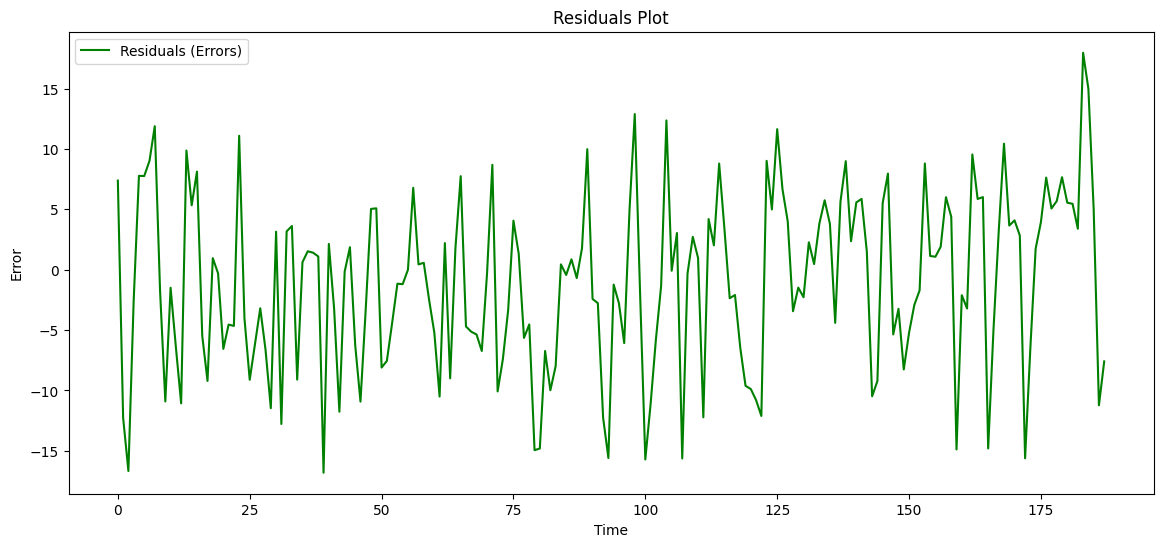

In [ ]:
errors = actual - predictions

plt.figure(figsize=(14,6))
plt.plot(errors, color='green', label='Residuals (Errors)')
plt.title('Residuals Plot')
plt.xlabel('Time')
plt.ylabel('Error')
plt.legend()
plt.show()


## **Histogram of Residuals.**


The histogram helps you understand the distribution of the residuals. Ideally, residuals should be normally distributed with a mean of zero. If they are not, it indicates that the model may not have captured the underlying patterns correctly.

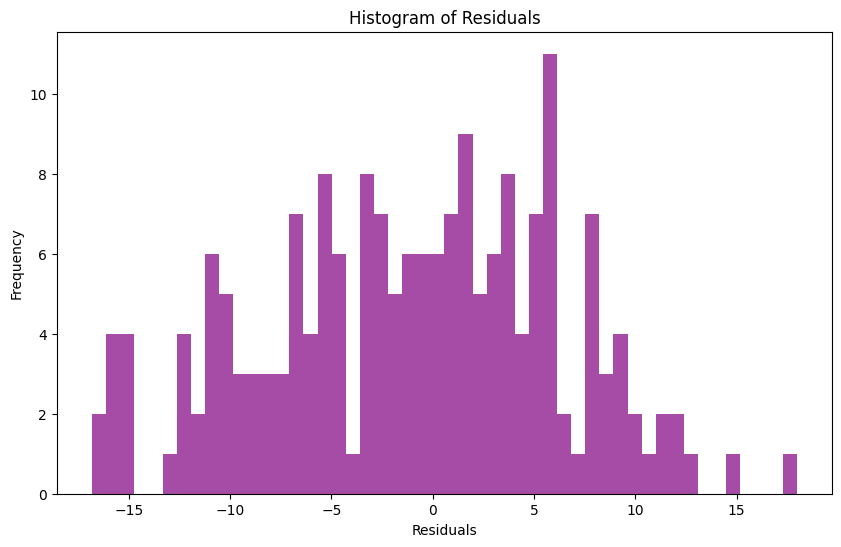

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(errors, bins=50, color='purple', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


## **Cumulative Sum of Errors.**


The cumulative sum of errors (also known as the cumulative residual plot) can help visualize whether errors are building up over time, which may suggest model bias.

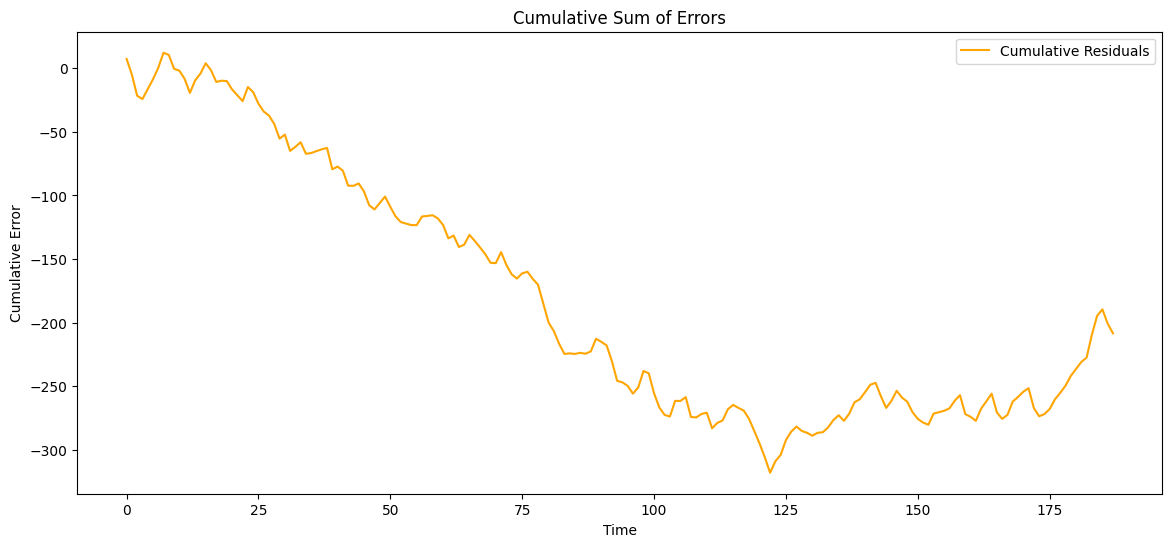

In [ ]:
cumulative_errors = np.cumsum(errors)

plt.figure(figsize=(14,6))
plt.plot(cumulative_errors, color='orange', label='Cumulative Residuals')
plt.title('Cumulative Sum of Errors')
plt.xlabel('Time')
plt.ylabel('Cumulative Error')
plt.legend()
plt.show()


## **Performance Metrics as Bar Chart.**


You can visualize the evaluation metrics (MAE, MSE, RMSE, R²) as a bar chart to make it easy to compare them.

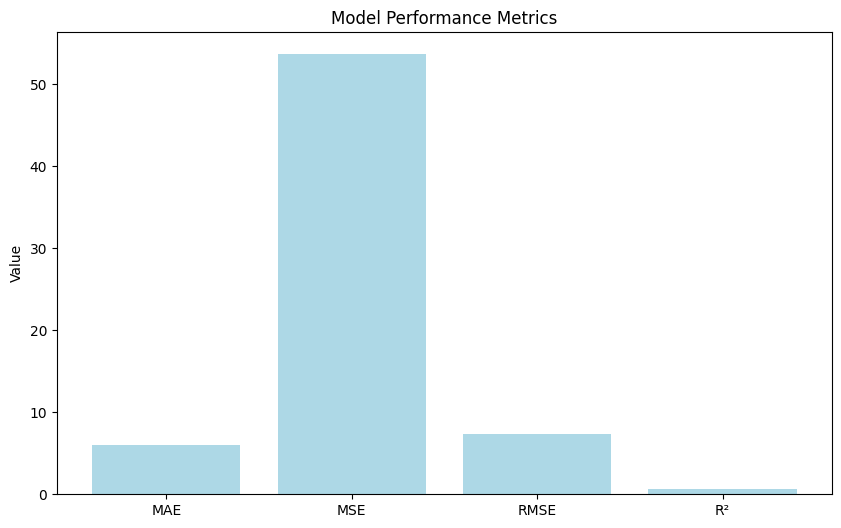

In [ ]:
metrics = [mae, mse, rmse, r2]
metric_names = ['MAE', 'MSE', 'RMSE', 'R²']

plt.figure(figsize=(10,6))
plt.bar(metric_names, metrics, color='lightblue')
plt.title('Model Performance Metrics')
plt.ylabel('Value')
plt.show()


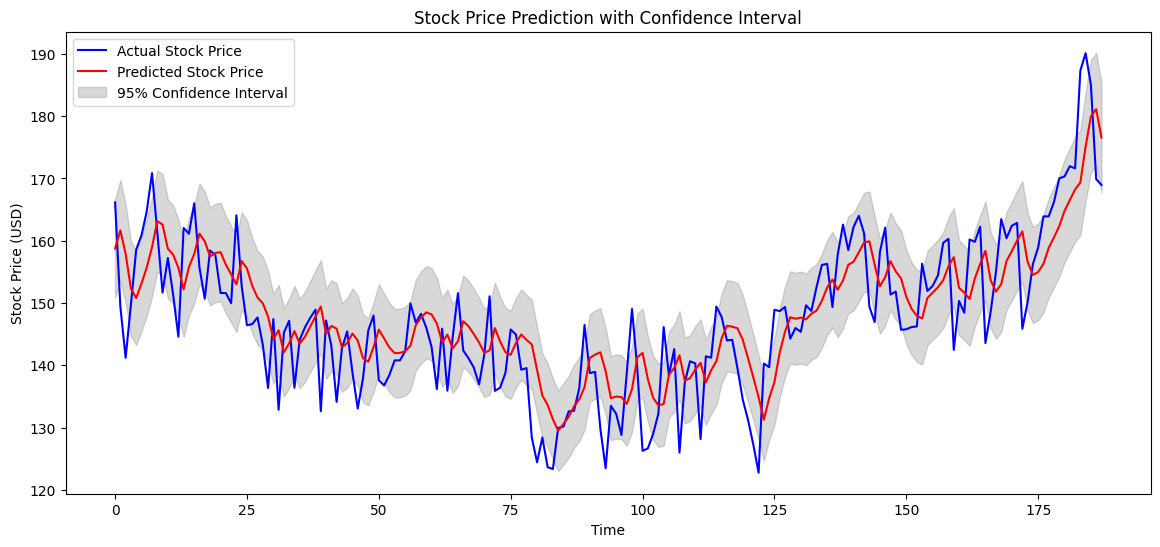

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate confidence interval (e.g., 95% confidence)
predictions_lower = predictions - (0.05 * predictions)  # 5% lower bound
predictions_upper = predictions + (0.05 * predictions)  # 5% upper bound

# Plot the predicted price along with the confidence interval
plt.figure(figsize=(14,6))
plt.plot(actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.fill_between(range(len(predictions)), predictions_lower.flatten(), predictions_upper.flatten(), color='gray', alpha=0.3, label='95% Confidence Interval')
plt.title('Stock Price Prediction with Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()



📈 Stock Price Prediction Report 📉

🔍 Prediction Accuracy (First 10 Samples)
---------------------------------------------
Index     Actual   Predicted  Difference  Accuracy
---------------------------------------------
0         166.14      158.76        7.38    95.56%
1         149.39      161.66      -12.26    91.79%
2         141.20      157.88      -16.68    88.19%
3         149.74      152.31       -2.57    98.28%
4         158.56      150.79        7.77    95.10%
5         160.86      153.11        7.75    95.18%
6         164.71      155.70        9.01    94.53%
7         170.85      158.96       11.88    93.04%
8         161.41      163.12       -1.71    98.94%
9         151.67      162.59      -10.91    92.80%

📊 Prediction Performance Summary
----------------------------------------
Most Recent Prediction:    $176.55
Average Prediction:         $148.49
Prediction Range:           $129.49 - $181.12
Mean Absolute Error (MAE):  $5.99
Mean Squared Error (MSE):   $53.68

🏆 Model 

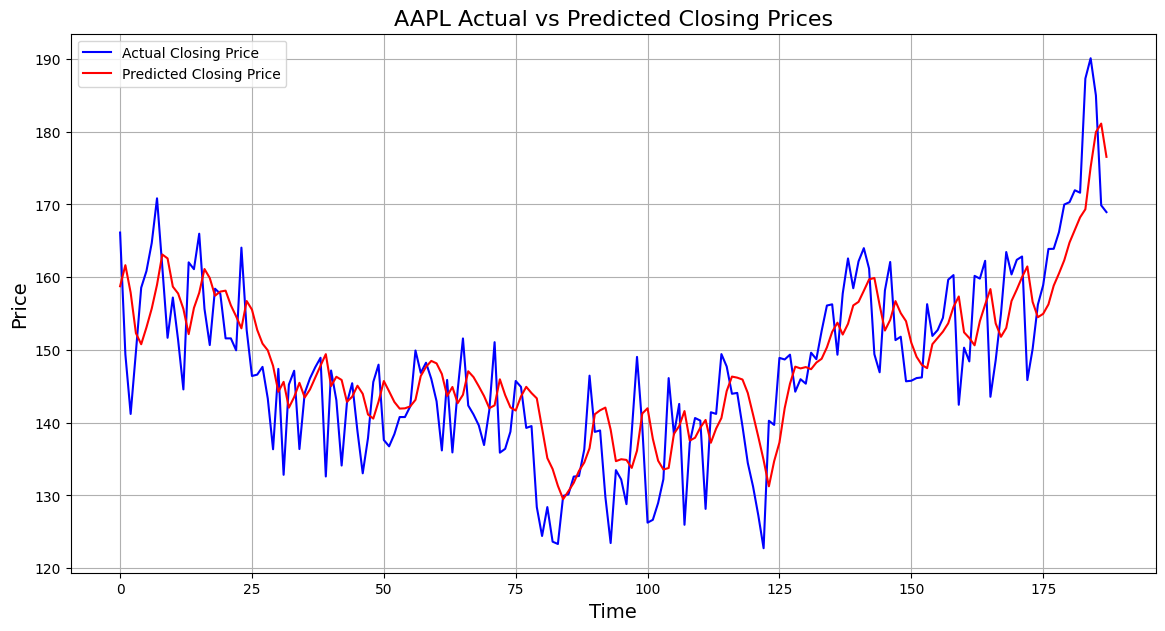

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assume 'predictions' and 'actual' are already created like you mentioned:
# predictions = model.predict(X_test)
# predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
# actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Flatten arrays
predictions = predictions.flatten()
actual = actual.flatten()

# Create a DataFrame for evaluation
eval_df = pd.DataFrame({
    'Actual': actual,
    'Predicted': predictions,
})

# Calculate Difference and Accuracy per sample
eval_df['Difference'] = eval_df['Actual'] - eval_df['Predicted']
eval_df['Accuracy'] = 100 - (abs(eval_df['Difference']) / eval_df['Actual'] * 100)

# Display first 10 samples
print("\n📈 Stock Price Prediction Report 📉")
print("="*40)
print("\n🔍 Prediction Accuracy (First 10 Samples)")
print("-"*45)
print(f"{'Index':<6}{'Actual':>10}{'Predicted':>12}{'Difference':>12}{'Accuracy':>10}")
print("-"*45)
for idx, row in eval_df.head(10).iterrows():
    print(f"{idx:<6}{row['Actual']:>10.2f}{row['Predicted']:>12.2f}{row['Difference']:>12.2f}{row['Accuracy']:>9.2f}%")

# Summary Statistics
mean_actual = np.mean(actual)
mean_predicted = np.mean(predictions)
min_predicted = np.min(predictions)
max_predicted = np.max(predictions)
mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)

# Simple confidence metric (lower standard deviation of differences means higher confidence)
prediction_stability = np.std(eval_df['Difference'])
confidence_level = 100 - (prediction_stability / mean_actual * 100)

print("\n📊 Prediction Performance Summary")
print("-"*40)
print(f"Most Recent Prediction:    ${predictions[-1]:.2f}")
print(f"Average Prediction:         ${mean_predicted:.2f}")
print(f"Prediction Range:           ${min_predicted:.2f} - ${max_predicted:.2f}")
print(f"Mean Absolute Error (MAE):  ${mae:.2f}")
print(f"Mean Squared Error (MSE):   ${mse:.2f}")

overall_accuracy = eval_df['Accuracy'].mean()
print(f"\n🏆 Model Performance Rating: {overall_accuracy:.1f}% accuracy")
rating = "🌟 Excellent - Model predictions are highly reliable" if overall_accuracy > 99 else "✅ Good - Slight room for improvement"
print(rating)

print("\n🔮 Future Prediction Confidence")
print("-"*40)
print(f"Prediction Stability:       {prediction_stability:.2f} (lower is better)")
print(f"Confidence Level:            {confidence_level:.1f}%")

# Plot Actual vs Predicted
plt.figure(figsize=(14,7))
plt.plot(actual, label='Actual Closing Price', color='blue')
plt.plot(predictions, label='Predicted Closing Price', color='red')
plt.title('AAPL Actual vs Predicted Closing Prices', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
